In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv("Decks_Dataset.csv")
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode
0,Mortar/Evolution,Royal_Guards/Evolution,Skeleton_Barrel,Dark_Prince,Mother_Witch,Arrows,The_Log,Rocket,82,88761,65.90%,6,34.10%,4.0,normal_battle
1,Furnace/Evolution,Knight/Evolution,Graveyard,Poison,Ice_Wizard,Goblin_Hut,Skeletons,Barbarian_Barrel,65,70794,56.50%,4,43.50%,3.3,normal_battle
2,Goblin_Giant/Evolution,PEKKA/Evolution,Goblin_Machine,Electro_Wizard,Goblin_Curse,Bomber,Arrows,Rage,63,213251,55.70%,20,44.30%,3.9,normal_battle
3,Goblin_Cage/Evolution,Royal_Guards/Evolution,Royal_Hogs,Flying_Machine,Fireball,Zappies,Arrows,Barbarian_Barrel,62,80210,55.20%,24,44.80%,4.1,normal_battle
4,Skeleton_Barrel/Evolution,Mortar/Evolution,Skeleton_King,Cannon_Cart,Goblin_Gang,Ice_Wizard,Arrows,Spear_Goblins,61,218736,54.80%,259,45.10%,3.4,normal_battle


In [21]:
# 2. Preprocesamiento
# Eliminar % en las columnas 'wins' y 'losses'
df["wins"] = df["wins"].str.replace("%", "").astype(float)
df["losses"] = df["losses"].str.replace("%", "").astype(float)

In [22]:
df["wins"] /= 100
df["losses"] /= 100

In [23]:
df["win_rate"] = df["wins"] / (df["wins"] + df["losses"])


In [24]:
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode,win_rate
0,Mortar/Evolution,Royal_Guards/Evolution,Skeleton_Barrel,Dark_Prince,Mother_Witch,Arrows,The_Log,Rocket,82,88761,0.659,6,0.341,4.0,normal_battle,0.659000
1,Furnace/Evolution,Knight/Evolution,Graveyard,Poison,Ice_Wizard,Goblin_Hut,Skeletons,Barbarian_Barrel,65,70794,0.565,4,0.435,3.3,normal_battle,0.565000
2,Goblin_Giant/Evolution,PEKKA/Evolution,Goblin_Machine,Electro_Wizard,Goblin_Curse,Bomber,Arrows,Rage,63,213251,0.557,20,0.443,3.9,normal_battle,0.557000
3,Goblin_Cage/Evolution,Royal_Guards/Evolution,Royal_Hogs,Flying_Machine,Fireball,Zappies,Arrows,Barbarian_Barrel,62,80210,0.552,24,0.448,4.1,normal_battle,0.552000
4,Skeleton_Barrel/Evolution,Mortar/Evolution,Skeleton_King,Cannon_Cart,Goblin_Gang,Ice_Wizard,Arrows,Spear_Goblins,61,218736,0.548,259,0.451,3.4,normal_battle,0.548549


In [25]:
# Convertir variables categóricas (ej. game_mode) a numéricas con one-hot encoding
df = pd.get_dummies(df, columns=["game_mode"], drop_first=True)
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,win_rate,game_mode_ranked,game_mode_ultimate_champion
0,Mortar/Evolution,Royal_Guards/Evolution,Skeleton_Barrel,Dark_Prince,Mother_Witch,Arrows,The_Log,Rocket,82,88761,0.659,6,0.341,4.0,0.659000,False,False
1,Furnace/Evolution,Knight/Evolution,Graveyard,Poison,Ice_Wizard,Goblin_Hut,Skeletons,Barbarian_Barrel,65,70794,0.565,4,0.435,3.3,0.565000,False,False
2,Goblin_Giant/Evolution,PEKKA/Evolution,Goblin_Machine,Electro_Wizard,Goblin_Curse,Bomber,Arrows,Rage,63,213251,0.557,20,0.443,3.9,0.557000,False,False
3,Goblin_Cage/Evolution,Royal_Guards/Evolution,Royal_Hogs,Flying_Machine,Fireball,Zappies,Arrows,Barbarian_Barrel,62,80210,0.552,24,0.448,4.1,0.552000,False,False
4,Skeleton_Barrel/Evolution,Mortar/Evolution,Skeleton_King,Cannon_Cart,Goblin_Gang,Ice_Wizard,Arrows,Spear_Goblins,61,218736,0.548,259,0.451,3.4,0.548549,False,False


In [26]:
# Crear un LabelEncoder para cada columna
for col in ["carta_1", "carta_2", "carta_3", "carta_4", "carta_5", "carta_6", "carta_7", "carta_8"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,win_rate,game_mode_ranked,game_mode_ultimate_champion
0,12,16,17,6,15,0,12,8,82,88761,0.659,6,0.341,4.0,0.659000,False,False
1,4,12,6,21,12,6,11,1,65,70794,0.565,4,0.435,3.3,0.565000,False,False
2,8,15,4,8,8,2,0,7,63,213251,0.557,20,0.443,3.9,0.557000,False,False
3,7,16,16,11,6,18,0,1,62,80210,0.552,24,0.448,4.1,0.552000,False,False
4,15,14,18,5,9,9,0,10,61,218736,0.548,259,0.451,3.4,0.548549,False,False


In [27]:
X = df[["carta_1", "carta_2","carta_3","carta_4","carta_5","carta_6","carta_7","carta_8", "rating", "usage", "draws", "avg.elixir", "game_mode_ranked", "game_mode_ultimate_champion"]]
y = df["win_rate"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],     
    "max_depth": [None, 10, 20, 30],    
    "min_samples_split": [2, 5, 10],   
    "min_samples_leaf": [1, 2, 4]       
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
MSE: 0.00
R2 Score: 0.59


C:\Users\agabr\AppData\Local\Temp\ipykernel_19516\1902826316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


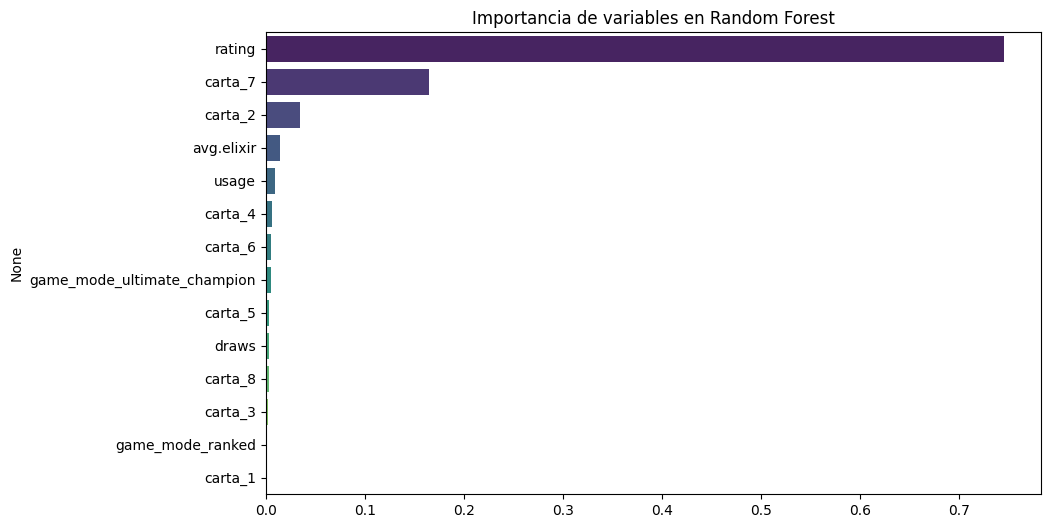

In [30]:
# 9. Importancia de variables
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Importancia de variables en Random Forest")
plt.show()
